<a href="https://colab.research.google.com/github/yamil-abraham/titanic-ML-from-disaster/blob/main/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv("train.csv")

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

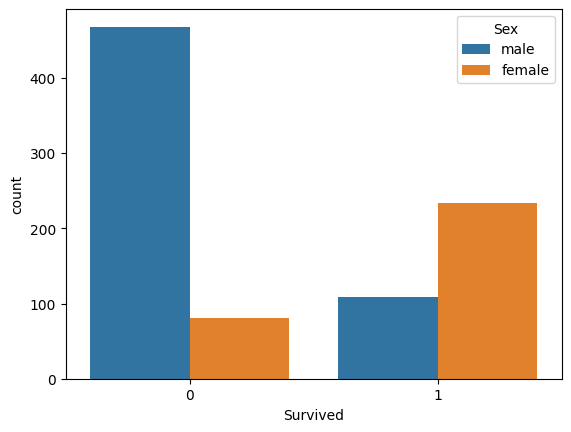

In [5]:
import seaborn as sb
sb.countplot(x="Survived", data=data, hue="Sex")

In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

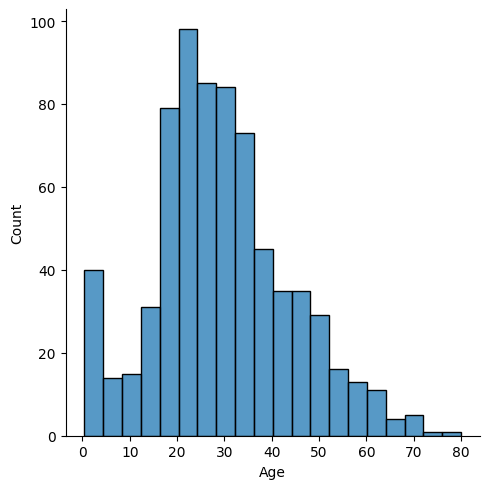

In [8]:
sb.displot(x="Age", data=data)

In [10]:
data["Age"].mean()

29.69911764705882

In [11]:
data["Age"].fillna(data["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [12]:
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [13]:
data["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [14]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
data = data.drop(["Cabin"], axis=1)

In [16]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
data = data.dropna()

In [31]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [20]:
data = data.drop(["Name", "PassengerId", "Ticket"], axis=1)

In [24]:
dummies_sex = pd.get_dummies(data["Sex"],drop_first=True)
#multilinearity

In [25]:
data = data.join(dummies_sex)
data = data.drop(["Sex"], axis=1)

<Axes: xlabel='Survived', ylabel='count'>

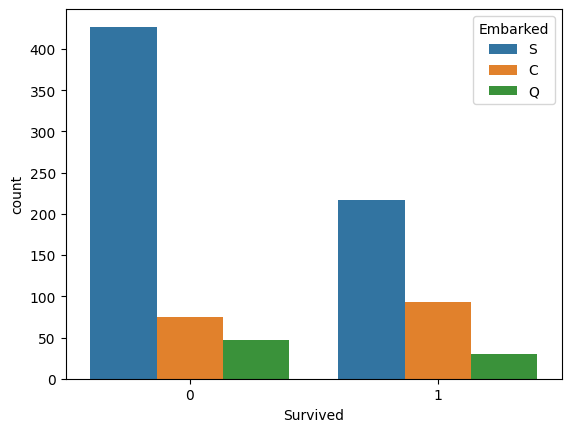

In [27]:
sb.countplot(x="Survived", data=data, hue="Embarked")

In [29]:
dummies_embarked = pd.get_dummies(data["Embarked"],drop_first=True)

In [30]:
data = data.join(dummies_embarked)
data = data.drop(["Embarked"], axis=1)

<Axes: >

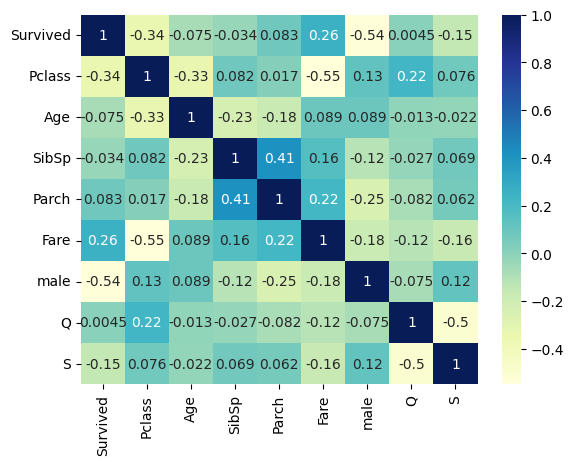

In [32]:
sb.heatmap(data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

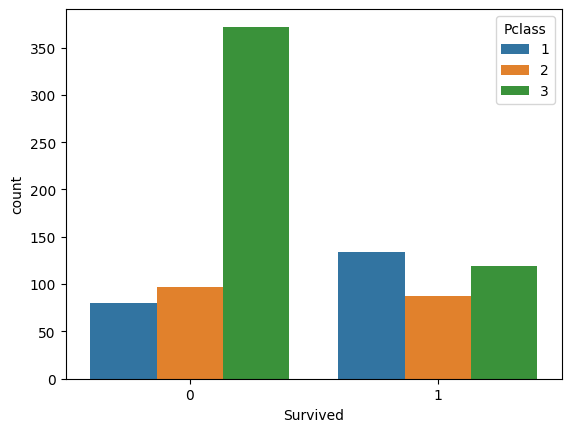

In [33]:
sb.countplot(x="Survived", data=data, hue="Pclass")

In [34]:
X = data.drop(["Survived"], axis=1)
y = data["Survived"]

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [38]:
predictions = model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8089887640449438

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       114
           1       0.74      0.72      0.73        64

    accuracy                           0.81       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178



In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[98, 16],
       [18, 46]])

In [42]:
pd.DataFrame(confusion_matrix(y_test, predictions), columns=["Pred: N", "Pred: Y"], index=["Real: N", "Real: Y"])

,Pred: N,Pred: Y
Real: N,98,16
Real: Y,18,46


In [43]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [46]:
add_me = [1, 28, 0, 0, 80, 1, 0, 0]

prediction_me = model.predict([add_me])
if prediction_me[0] == 1:
  print("Survived")
else:
  print("No survived")

Survived


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
